# NLP-1 Assignment

Dataset URL : https://www.kaggle.com/datasets/ahmedmoabbas/arabic-reviews

# Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import seaborn as sns
import random
import re                                  # library for regular expression operations
import string                              # for string operations

import nltk                                # Python library for NLP
from nltk.tokenize import word_tokenize

# Read the dataset

In [93]:
df = pd.read_csv('arabic_reviews.csv')

# Review the first ten rows

In [94]:
df.head(10)

,label,text
0,Positive,ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور...
1,Negative,كتاب حكم النبي محمد الذي كتبه الأديب الروائي ا...
2,Positive,معلومات تاريخية عن الثورة الإيرانية وما حدث في...
3,Negative,جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا ق...
4,Positive,شقة ممتازة . أعجبني كل شيء وخاصة طاقم العمل..
5,Negative,صعب تصدق الروايه و صعب انك تربط احداثها و الاص...
6,Negative,مخيب للأمل. . يجب توفير الماء للشرب طوال فترة ...
7,Negative,الحق أني وصلت الصفحة و لم أكمل . الحاجة إلى ال...
8,Positive,: . بهاء طاهر كالعادة. بحب جدا طريقة الرمز... ...
9,Negative,اقامة غير ممتعة ، مستوى نظافة متدني ، بوفيه غا...


# Print the shape of the dataset

In [95]:
df.shape

(66666, 2)

# Plot displot to visualize the length of each text

- Add new column length.
- The number of bins is equal to 300.

In [96]:
df['length'] = df['text'].apply(lambda x: len(word_tokenize(x)))
df


,label,text,length
0,Positive,ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور...,21
1,Negative,كتاب حكم النبي محمد الذي كتبه الأديب الروائي ا...,156
2,Positive,معلومات تاريخية عن الثورة الإيرانية وما حدث في...,32
3,Negative,جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا ق...,22
4,Positive,شقة ممتازة . أعجبني كل شيء وخاصة طاقم العمل..,10
...,...,...,...
66661,Negative,على الرغم من اعجابي الكبير للشاعر امل دنقل، ال...,82
66662,Negative,اختلف كثيرا مع فلسفة نيشية وبحث زرادشت عن الان...,214
66663,Positive,ممتاز لشباب ولكن يحتاج الى عوازل صوت . كل شي ج...,16
66664,Positive,لذيذ ولكن مطعم البسبور لذيذ جدا وطريقة تقديمهم...,19


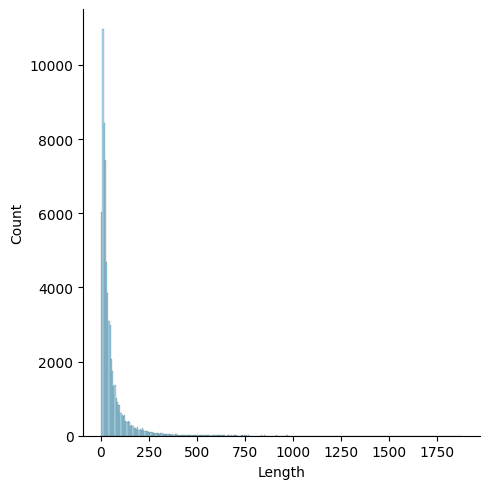

In [97]:
sns.displot(df['length'], bins=300, kde=False, color='skyblue')

plt.xlabel('Length')
plt.ylabel('Count')
plt.show()



# Statistical summary of the length column

- Explain what did you notice?


In [98]:
df.describe()

,length
count,66666.000000
mean,57.365899
std,100.881692
min,1.000000
25%,13.000000
50%,27.000000
75%,59.000000
max,1879.000000


# Explaination :

- Write your explaination here :
The summary statistics reveal that the lengths of most texts are centered around the mean value of approximately 57 words. There is a noticeable variation, as indicated by the standard deviation of around 100.88. The minimum text length is 1 word, while the maximum goes up to 1879 words. The median, or 50th percentile, is 27 words, suggesting that half of the texts have lengths less than or equal to 27 words. Additionally, 75% of the texts have lengths of 59 words or fewer.


# Plot a violin plot of the labels and its length

- We need to find the relationship between the text and its length.

<Axes: xlabel='label', ylabel='length'>

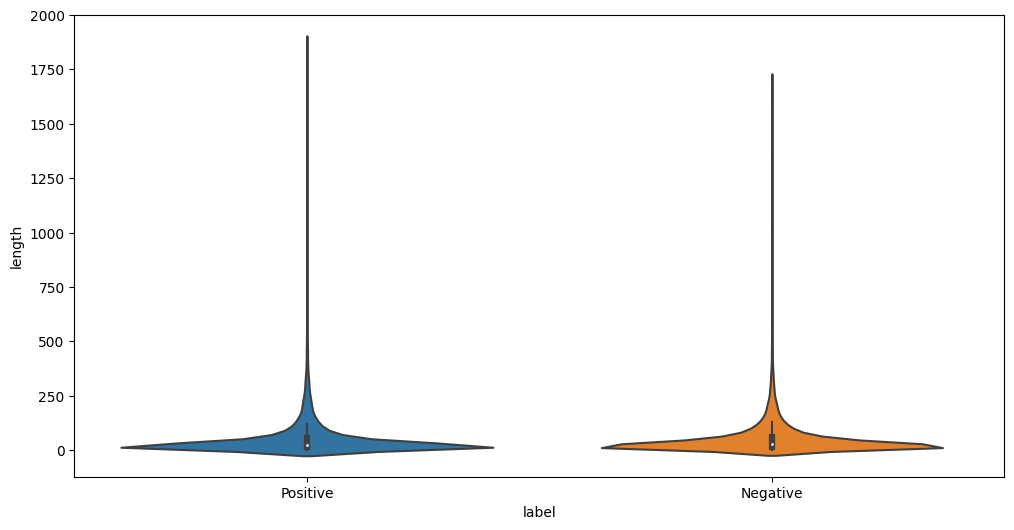

In [99]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='label', y='length', data=df)

# Plot a box plot of the length

- Y axis is the length

<Axes: ylabel='length'>

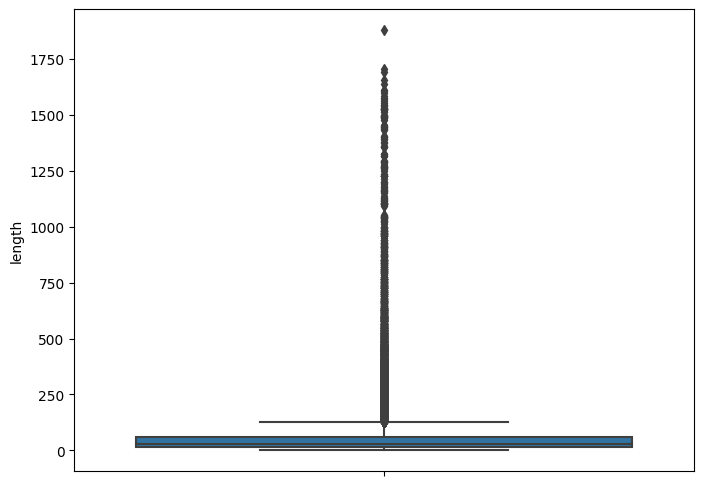

In [100]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='length', data=df)

# Remove the outliers

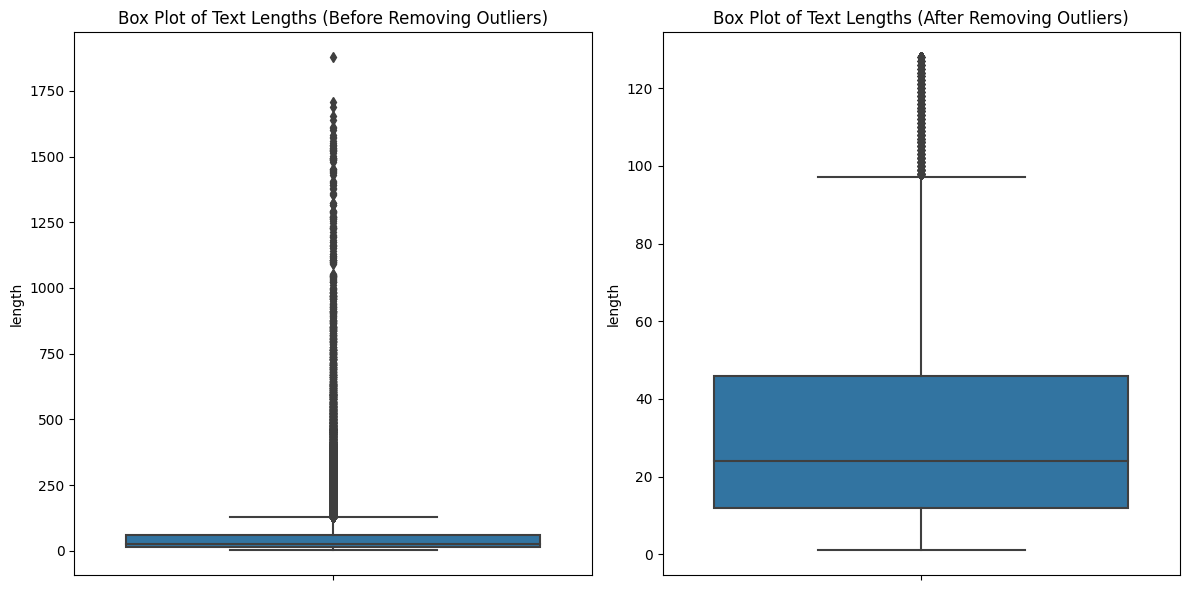

In [101]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='length', data=df)
plt.title('Box Plot of Text Lengths (Before Removing Outliers)')


Q1 = df['length'].quantile(0.25)
Q3 = df['length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers= df[(df['length'] >= lower_bound) & (df['length'] <= upper_bound)]


plt.subplot(1, 2, 2)
sns.boxplot(y='length', data=df_no_outliers)
plt.title('Box Plot of Text Lengths (After Removing Outliers)')


plt.tight_layout()
plt.show()

# Plot the displot again

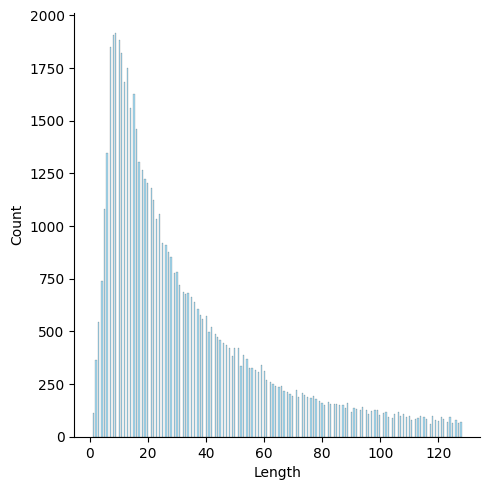

In [102]:
sns.displot(df_no_outliers ['length'], bins=300, kde=False, color='skyblue')

plt.xlabel('Length')
plt.ylabel('Count')
plt.show()


# Plot a violin plot again

<Axes: xlabel='label', ylabel='length'>

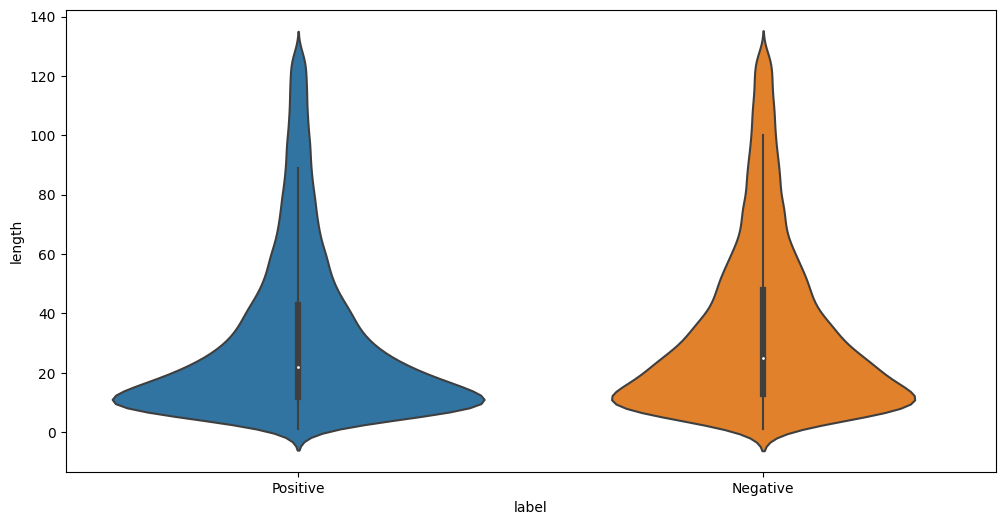

In [103]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='label', y='length', data=df_no_outliers )

# Plot a box plot again

<Axes: ylabel='length'>

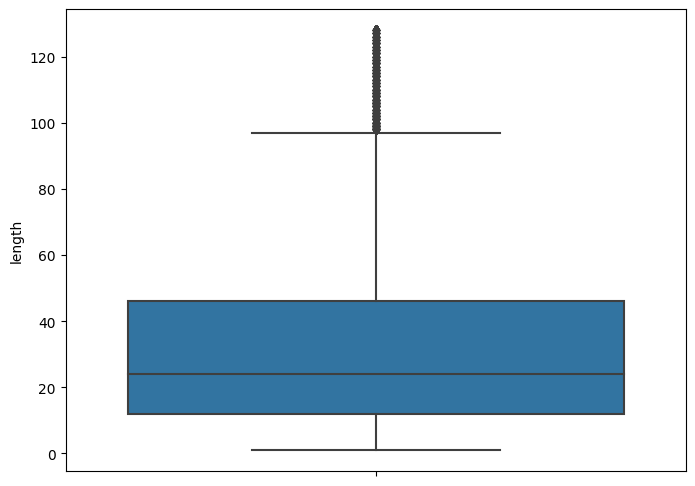

In [104]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='length', data=df_no_outliers )

# Print the shape after removing outliers

In [105]:
df_no_outliers.shape

(59977, 3)

# Drop the length column

In [106]:
df = df_no_outliers.drop('length', axis=1)

In [107]:
df.shape

(59977, 2)

# Split the dataset into positive and negative sets

- positive_data : Contains all positive data.
- negative_data : Contains all negative data.
- Reset the indexes, and do not forget to drop unwanted columns.

In [108]:
positive_data = df[df['label'] == 'Positive'].reset_index(drop=True)

print("Positive Data:")
positive_data.head()


Positive Data:


,label,text
0,Positive,ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور...
1,Positive,معلومات تاريخية عن الثورة الإيرانية وما حدث في...
2,Positive,شقة ممتازة . أعجبني كل شيء وخاصة طاقم العمل..
3,Positive,: . بهاء طاهر كالعادة. بحب جدا طريقة الرمز... ...
4,Positive,كتاب مميز وفريد سرد فيه بشكل مختلف عن سيدنا مح...


In [109]:
negative_data = df[df['label'] == 'Negative'].reset_index(drop=True)
print("\nNegative Data:")
negative_data.head()



Negative Data:


,label,text
0,Negative,جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا ق...
1,Negative,صعب تصدق الروايه و صعب انك تربط احداثها و الاص...
2,Negative,مخيب للأمل. . يجب توفير الماء للشرب طوال فترة ...
3,Negative,الحق أني وصلت الصفحة و لم أكمل . الحاجة إلى ال...
4,Negative,اقامة غير ممتعة ، مستوى نظافة متدني ، بوفيه غا...


# Plot a pie plot to visualize the classes

- Print the number of positive texts.
- Print the number of negative texts.
- Then, visualize them.

Number of Positive Tweets: 29942
Number of Negative Tweets: 30035


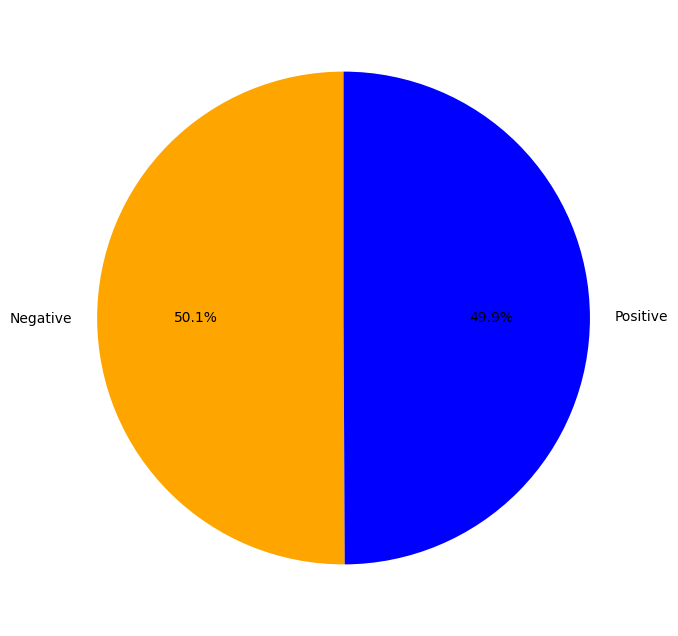

In [110]:
class_counts = df['label'].value_counts()
labels = class_counts.index
sizes = class_counts.values

num_positive_texts = class_counts['Positive']
num_negative_texts = class_counts['Negative']

print(f"Number of Positive Tweets: {num_positive_texts}")
print(f"Number of Negative Tweets: {num_negative_texts}")

colors = ['orange', 'blue']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,colors=colors)
plt.show()



# Print the first texts of both positive and negative sets

In [111]:
positive_data = df[df['label'] == 'Positive'].reset_index(drop=True)
negative_data = df[df['label'] == 'Negative'].reset_index(drop=True)

# Print the first text of the Positive set if it exists
if not positive_data.empty:
    print("Positive Tweets:")
    print(positive_data['text'][0])
else:
    print("No positive texts in the dataset.")

# Print the first text of the Negative set if it exists
if not negative_data.empty:
    print("\nNegative Tweets:")
    print(negative_data['text'][0])
else:
    print("No negative texts in the dataset.")


Positive Tweets:
ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور او السحور وتعامل الاستقبال قمة في الذوق والفندق بشكل عام ممتاز.

Negative Tweets:
جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا قصصا تسوق إستنتجات ليست منطقيه.. صنية بسبوسه إستثمار أفضل من شراء الكتاب


# Complex text

In [112]:
complex_tweet = df.loc[19, 'text']
print(complex_tweet)

قرأت أن هذا الكتاب لا يجب أن يقرأه متعصب .. و ها أنا أعود لأحذر الباقين .. إن كنت ترى أنك لا تخطئ أبدا و أنك الحق الذي لا يزايله ضلال ، فلا تقرأ الكتاب ... الرواية كان فيها من سطور تاريخ العراق الكثير .. حديث الكاتب عن حنة ؛ جعلني أتخيلها إحدى العجائز من قريباتي المسلمات ؛ أرواح تحمل ذلك الاستسلام الفطري الخفي لتعاليم الله .. كأنهن قد نذرن أعمارهن بغية أن تصلنا صورة العذراء في طهرها و قداستها .. ذلك الجنوح صوب الروحانية و الصلوات تخترق كل ذي قلب .. عشت مع الرواية بكل جوارحي .. جميلة بحق ..


# Optional : Clean the Complex Text

In [90]:
import re

def clean_text(text):
    # Removing non-alphanumeric characters, except Arabic letters
    cleaned_text = re.sub(r'[^a-zA-Z\u0600-\u06FF\s]', '', text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text
cleaned_complex_tweet = clean_text(complex_tweet)


print("Original Complex Text:")
print(complex_tweet)

print("\nCleaned Complex Text:")
print(cleaned_complex_tweet)


Original Complex Text:
قرأت أن هذا الكتاب لا يجب أن يقرأه متعصب .. و ها أنا أعود لأحذر الباقين .. إن كنت ترى أنك لا تخطئ أبدا و أنك الحق الذي لا يزايله ضلال ، فلا تقرأ الكتاب ... الرواية كان فيها من سطور تاريخ العراق الكثير .. حديث الكاتب عن حنة ؛ جعلني أتخيلها إحدى العجائز من قريباتي المسلمات ؛ أرواح تحمل ذلك الاستسلام الفطري الخفي لتعاليم الله .. كأنهن قد نذرن أعمارهن بغية أن تصلنا صورة العذراء في طهرها و قداستها .. ذلك الجنوح صوب الروحانية و الصلوات تخترق كل ذي قلب .. عشت مع الرواية بكل جوارحي .. جميلة بحق ..

Cleaned Complex Text:
قرأت أن هذا الكتاب لا يجب أن يقرأه متعصب  و ها أنا أعود لأحذر الباقين  إن كنت ترى أنك لا تخطئ أبدا و أنك الحق الذي لا يزايله ضلال ، فلا تقرأ الكتاب  الرواية كان فيها من سطور تاريخ العراق الكثير  حديث الكاتب عن حنة ؛ جعلني أتخيلها إحدى العجائز من قريباتي المسلمات ؛ أرواح تحمل ذلك الاستسلام الفطري الخفي لتعاليم الله  كأنهن قد نذرن أعمارهن بغية أن تصلنا صورة العذراء في طهرها و قداستها  ذلك الجنوح صوب الروحانية و الصلوات تخترق كل ذي قلب  عشت مع الرواية بكل جو

# Tokenize the complex text

In [26]:
def tokenize_text(text):

    cleaned_text = re.sub(r'[^a-zA-Z\u0600-\u06FF\s]', '', text)
    tokens = word_tokenize(cleaned_text)
    return tokens

tokenized_complex_tweet = tokenize_text(complex_tweet)


print("he Complex Tweet Before Tokenization:")
print(complex_tweet)

print("\nThe Complex Tweet After Tokenization:")
print(tokenized_complex_tweet)


he Complex Tweet Before Tokenization:
قرأت أن هذا الكتاب لا يجب أن يقرأه متعصب .. و ها أنا أعود لأحذر الباقين .. إن كنت ترى أنك لا تخطئ أبدا و أنك الحق الذي لا يزايله ضلال ، فلا تقرأ الكتاب ... الرواية كان فيها من سطور تاريخ العراق الكثير .. حديث الكاتب عن حنة ؛ جعلني أتخيلها إحدى العجائز من قريباتي المسلمات ؛ أرواح تحمل ذلك الاستسلام الفطري الخفي لتعاليم الله .. كأنهن قد نذرن أعمارهن بغية أن تصلنا صورة العذراء في طهرها و قداستها .. ذلك الجنوح صوب الروحانية و الصلوات تخترق كل ذي قلب .. عشت مع الرواية بكل جوارحي .. جميلة بحق ..

The Complex Tweet After Tokenization:
['قرأت', 'أن', 'هذا', 'الكتاب', 'لا', 'يجب', 'أن', 'يقرأه', 'متعصب', 'و', 'ها', 'أنا', 'أعود', 'لأحذر', 'الباقين', 'إن', 'كنت', 'ترى', 'أنك', 'لا', 'تخطئ', 'أبدا', 'و', 'أنك', 'الحق', 'الذي', 'لا', 'يزايله', 'ضلال', '،', 'فلا', 'تقرأ', 'الكتاب', 'الرواية', 'كان', 'فيها', 'من', 'سطور', 'تاريخ', 'العراق', 'الكثير', 'حديث', 'الكاتب', 'عن', 'حنة', '؛', 'جعلني', 'أتخيلها', 'إحدى', 'العجائز', 'من', 'قريباتي', 'المسلمات', '؛', 'أرو

# Use NLTK to import the arabic stopwords.

- If you have any external stopword list, bring it and use it. It is OK :).

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
from nltk.corpus import stopwords
def process_text(text, stopword_list=None):

    cleaned_text = re.sub(r'[^a-zA-Z\u0600-\u06FF\s]', '', text)
    tokens = word_tokenize(cleaned_text)
    if stopword_list:
        tokens = [token for token in tokens if token.lower() not in stopword_list]

    return tokens


arabic_stopwords = set(stopwords.words('arabic'))

tokenized_complex_tweet_with_stopwords = process_text(complex_tweet, stopword_list=arabic_stopwords)


print("Original Complex Text:")
print(complex_tweet)

print("\nTokenized Complex Text without Stopwords:")
print(tokenized_complex_tweet_with_stopwords)


Original Complex Text:
قرأت أن هذا الكتاب لا يجب أن يقرأه متعصب .. و ها أنا أعود لأحذر الباقين .. إن كنت ترى أنك لا تخطئ أبدا و أنك الحق الذي لا يزايله ضلال ، فلا تقرأ الكتاب ... الرواية كان فيها من سطور تاريخ العراق الكثير .. حديث الكاتب عن حنة ؛ جعلني أتخيلها إحدى العجائز من قريباتي المسلمات ؛ أرواح تحمل ذلك الاستسلام الفطري الخفي لتعاليم الله .. كأنهن قد نذرن أعمارهن بغية أن تصلنا صورة العذراء في طهرها و قداستها .. ذلك الجنوح صوب الروحانية و الصلوات تخترق كل ذي قلب .. عشت مع الرواية بكل جوارحي .. جميلة بحق ..

Tokenized Complex Text without Stopwords:
['قرأت', 'الكتاب', 'يجب', 'يقرأه', 'متعصب', 'أعود', 'لأحذر', 'الباقين', 'كنت', 'ترى', 'أنك', 'تخطئ', 'أنك', 'الحق', 'يزايله', 'ضلال', '،', 'تقرأ', 'الكتاب', 'الرواية', 'سطور', 'تاريخ', 'العراق', 'الكثير', 'حديث', 'الكاتب', 'حنة', '؛', 'جعلني', 'أتخيلها', 'العجائز', 'قريباتي', 'المسلمات', '؛', 'أرواح', 'تحمل', 'الاستسلام', 'الفطري', 'الخفي', 'لتعاليم', 'الله', 'كأنهن', 'نذرن', 'أعمارهن', 'بغية', 'تصلنا', 'صورة', 'العذراء', 'طهرها', 'قدا

# Print the whole stopwords

In [33]:
arabic_stopwords = set(stopwords.words('arabic'))

print("Arabic Stopwords:")
arabic_stopwords


Arabic Stopwords:


{'ء',
 'ءَ',
 'آ',
 'آب',
 'آذار',
 'آض',
 'آمينَ',
 'آناء',
 'آنفا',
 'آه',
 'آها',
 'آهاً',
 'آهٍ',
 'آهِ',
 'آي',
 'أ',
 'أبدا',
 'أبريل',
 'أبو',
 'أبٌ',
 'أجل',
 'أجمع',
 'أحد',
 'أخبر',
 'أخذ',
 'أخو',
 'أخٌ',
 'أربع',
 'أربعاء',
 'أربعة',
 'أربعمئة',
 'أربعمائة',
 'أرى',
 'أسكن',
 'أصبح',
 'أصلا',
 'أضحى',
 'أطعم',
 'أعطى',
 'أعلم',
 'أغسطس',
 'أف',
 'أفريل',
 'أفعل به',
 'أفٍّ',
 'أقبل',
 'أقل',
 'أكتوبر',
 'أكثر',
 'أل',
 'ألا',
 'ألف',
 'ألفى',
 'أم',
 'أما',
 'أمام',
 'أمامك',
 'أمامكَ',
 'أمد',
 'أمس',
 'أمسى',
 'أمّا',
 'أن',
 'أنا',
 'أنبأ',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'أنتِ',
 'أنشأ',
 'أنى',
 'أنًّ',
 'أنّى',
 'أهلا',
 'أو',
 'أوت',
 'أوشك',
 'أول',
 'أولئك',
 'أولاء',
 'أولالك',
 'أوه',
 'أوّهْ',
 'أى',
 'أي',
 'أيا',
 'أيار',
 'أيضا',
 'أيلول',
 'أين',
 'أينما',
 'أيها',
 'أيّ',
 'أيّان',
 'أُفٍّ',
 'ؤ',
 'إحدى',
 'إذ',
 'إذا',
 'إذاً',
 'إذما',
 'إذن',
 'إزاء',
 'إلا',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'إليكنّ',
 'إليكَ',
 'إلَيْكَ',
 'إلّا',


# Print the punctuation marks

- Hint : Use string python class to print the punctuation marks. You can use an external punctuation marks list.
- Another Hint : The dataset contains a punctuation marks that are not in the punctuation marks of Python, such as ،؛
- Try to figure out how to add these punctuation marks to use them in the next step.

In [36]:
import string

standard_punctuation = set(string.punctuation)

additional_punctuation = set(['،', '؛'])

all_punctuation = standard_punctuation.union(additional_punctuation)
print(all_punctuation)


{'#', '-', '~', '&', '{', '%', "'", '^', ';', ']', ',', '?', ')', '/', '،', '(', ':', '"', '=', '_', '!', '[', '>', '|', '*', '}', '$', '\\', '@', '.', '؛', '`', '<', '+'}


# Remove stopwords and punctuation marks

- Hint : in the punctuation marks, you will find an error if you use the same method as we discuss in the lecture. Figure out what is the suitable method in our situation.

In [45]:
tokens = word_tokenize(complex_tweet)

# Before removing stopwords, punctuation marks
print("Before Removing Stopwords and Punctuation Marks :-")
print("-" * 50)
print(complex_tweet)
print("\n" + "-" * 50)

# Remove stopwords, punctuation marks
filtered_tokens = [token for token in tokens if token.lower() not in arabic_stopwords and token not in all_punctuation and ".." not in token]

# After removing stopwords, punctuation marks
filtered_text = " ".join(filtered_tokens)
print("\nAfter Removing Stopwords and Punctuation Marks :-")
print("-" * 50)
print(filtered_text)
print("\n" + "-" * 50)


Before Removing Stopwords and Punctuation Marks :-
--------------------------------------------------
قرأت أن هذا الكتاب لا يجب أن يقرأه متعصب .. و ها أنا أعود لأحذر الباقين .. إن كنت ترى أنك لا تخطئ أبدا و أنك الحق الذي لا يزايله ضلال ، فلا تقرأ الكتاب ... الرواية كان فيها من سطور تاريخ العراق الكثير .. حديث الكاتب عن حنة ؛ جعلني أتخيلها إحدى العجائز من قريباتي المسلمات ؛ أرواح تحمل ذلك الاستسلام الفطري الخفي لتعاليم الله .. كأنهن قد نذرن أعمارهن بغية أن تصلنا صورة العذراء في طهرها و قداستها .. ذلك الجنوح صوب الروحانية و الصلوات تخترق كل ذي قلب .. عشت مع الرواية بكل جوارحي .. جميلة بحق ..

--------------------------------------------------

After Removing Stopwords and Punctuation Marks :-
--------------------------------------------------
قرأت الكتاب يجب يقرأه متعصب أعود لأحذر الباقين كنت ترى أنك تخطئ أنك الحق يزايله ضلال تقرأ الكتاب الرواية سطور تاريخ العراق الكثير حديث الكاتب حنة جعلني أتخيلها العجائز قريباتي المسلمات أرواح تحمل الاستسلام الفطري الخفي لتعاليم الله كأنهن نذرن أعماره

# Stemming

- Hint : Search for snowballstemmer and use it to stem the arabic words. Or, if you have another tool or library to stem the arabic words, use it and explain why did you use it.

- snowballstemmer : https://arabicstemmer.com/

In [46]:
pip install snowballstemmer

In [58]:
from snowballstemmer import stemmer
arabic_stemmer = stemmer("arabic")

filtered_text = " ".join(filtered_tokens)
print("\nBefore stemming :-")

print(filtered_text)
print("\n" + "-" * 50)

# Stem each token using the Arabic Snowball stemmer
stemmed_tokens = [arabic_stemmer.stemWord(token) for token in filtered_tokens]

# After stemming
print("\nAfter Stemming :-")

print(" ".join(stemmed_tokens))




Before stemming :-
قرأت الكتاب يجب يقرأه متعصب أعود لأحذر الباقين كنت ترى أنك تخطئ أنك الحق يزايله ضلال تقرأ الكتاب الرواية سطور تاريخ العراق الكثير حديث الكاتب حنة جعلني أتخيلها العجائز قريباتي المسلمات أرواح تحمل الاستسلام الفطري الخفي لتعاليم الله كأنهن نذرن أعمارهن بغية تصلنا صورة العذراء طهرها قداستها الجنوح صوب الروحانية الصلوات تخترق قلب عشت الرواية بكل جوارحي جميلة بحق

--------------------------------------------------

After Stemming :-
قرء كتاب يجب يقرء متعصب اعود لاحذر باق كنت تري انك تخطء انك الحق يزايل ضلال تقرء كتاب روا سطور تاريخ عراق كثير حديث كاتب حنة جعل اتخيل عجايز قريبات مسلم ارواح تحمل استسلام فطر الخف لتعاليم الله كان نذر اعمار بغ تصل صور عذراء طهر قداس جنوح صوب روحان صلو تخترق قلب عشت روا بكل جوارح جميل بحق


# General text preprocessing function

- Build a general function for the whole texts.
- The function recieve a text, prepare it, then return the result text.
- It will starts with text cleaning, then tokenization, remove stopwords, remove punctuation marks, and lastly stem the tokens (as we did before with the complex text).

In [59]:
from snowballstemmer import stemmer
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords

def preprocess_text(text):

    arabic_stopwords = set(stopwords.words('arabic'))
    standard_punctuation = set(string.punctuation)
    additional_punctuation = set(['،', '؛'])
    all_punctuation = standard_punctuation.union(additional_punctuation)


    arabic_stemmer = stemmer("arabic")
    cleaned_text = ''.join(c for c in text if c.isalnum() or c.isspace())
    tokens = word_tokenize(cleaned_text)
    filtered_tokens = [token for token in tokens if token.lower() not in arabic_stopwords and token not in all_punctuation]

    stemmed_tokens = [arabic_stemmer.stemWord(token) for token in filtered_tokens]
    preprocessed_text = " ".join(stemmed_tokens)

    return preprocessed_text

# Example usage
sample_text = "قرأت الكتاب يجب يقرأه متعصب أعود لأحذر الباقين"
preprocessed_sample = preprocess_text(sample_text)

print("Original Text:")
print(sample_text)
print("\nPreprocessed Text:")
print(preprocessed_sample)


Original Text:
قرأت الكتاب يجب يقرأه متعصب أعود لأحذر الباقين

Preprocessed Text:
قرء كتاب يجب يقرء متعصب اعود لاحذر باق


# Map the label column

- Positive = 1
- Negative = 0

In [113]:
df['label'] = df['label'].map({'Positive': 1, 'Negative': 0})
df

,label,text
0,1,ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور...
2,1,معلومات تاريخية عن الثورة الإيرانية وما حدث في...
3,0,جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا ق...
4,1,شقة ممتازة . أعجبني كل شيء وخاصة طاقم العمل..
5,0,صعب تصدق الروايه و صعب انك تربط احداثها و الاص...
...,...,...
66660,0,احسست اخيرا بشعور مدرسيين العربى وهما بيصححوا ...
66661,0,على الرغم من اعجابي الكبير للشاعر امل دنقل، ال...
66663,1,ممتاز لشباب ولكن يحتاج الى عوازل صوت . كل شي ج...
66664,1,لذيذ ولكن مطعم البسبور لذيذ جدا وطريقة تقديمهم...


In [114]:
df.tail()

,label,text
66660,0,احسست اخيرا بشعور مدرسيين العربى وهما بيصححوا ...
66661,0,على الرغم من اعجابي الكبير للشاعر امل دنقل، ال...
66663,1,ممتاز لشباب ولكن يحتاج الى عوازل صوت . كل شي ج...
66664,1,لذيذ ولكن مطعم البسبور لذيذ جدا وطريقة تقديمهم...
66665,1,هذه هى أول محاولة جادة من طرفي لقراءة إحدى أعم...


# Split the dataset into X and Y

In [156]:
df_sample = df.head(1000)
X = df_sample[['text']]
Y = df_sample[['label']]

# Word frequency dictionary

In [157]:
def build_freqs(texts, labels):

    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    yslist = np.squeeze(labels).tolist()

    # Write your code here
    freqs = {}
    for text, y in zip(texts, yslist):

        cleaned_text = preprocess_text(text)

        for token in cleaned_text:
            pair = (token, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [158]:
# create frequency dictionary
freqs = build_freqs(X, Y)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) =  {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) =  3


# Split the data into training and testing sets

- The testing set should take 20% of the dataset.
- Make sure, random state is 42.

In [159]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set - X shape:", X_train.shape)
print("Training set - y shape:", Y_train.shape)
print("Testing set - X shape:", X_test.shape)
print("Testing set - y shape:", Y_test.shape)

Training set - X shape: (800, 1)
Training set - y shape: (800, 1)
Testing set - X shape: (200, 1)
Testing set - y shape: (200, 1)


In [160]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 1), (200, 1), (800, 1), (200, 1))

# Feature extraction function

In [161]:
def extract_features(text, freqs, process_textt=process_text):

    # process_tweet tokenizes, stems, and removes stopwords
    word_list = process_text(text)

    # 3 elements for [positive, negative] counts
    x = np.zeros((1, 2))

    # loop through each word in the list of words
    for word in word_list:

        # increment the word count for the positive label 1
        x[0,0] += freqs.get((word, 1.0), 0)

        # increment the word count for the negative label 0
        x[0,1] += freqs.get((word, 0.0), 0)

    return x

# Extract features for training

In [162]:
print("Length of X_train:", len(X_train))
print("Shape of train array:", X.shape)


Length of X_train: 800
Shape of train array: (1000, 1)


In [165]:
import numpy as np

train = np.zeros((len(X_train), 2))

for i, row in X_train.iterrows():
    if i < len(X_train):  # Check if the index is within bounds
        train[i, :] = extract_features(row['text'], freqs)
        print(f'text {i} processing finished')


text 31 processing finished
text 595 processing finished
text 773 processing finished
text 618 processing finished
text 662 processing finished
text 181 processing finished
text 552 processing finished
text 72 processing finished
text 153 processing finished
text 730 processing finished
text 363 processing finished
text 739 processing finished
text 274 processing finished
text 787 processing finished
text 337 processing finished
text 51 processing finished
text 3 processing finished
text 604 processing finished
text 384 processing finished
text 596 processing finished
text 378 processing finished
text 535 processing finished
text 641 processing finished
text 35 processing finished
text 33 processing finished
text 252 processing finished
text 210 processing finished
text 365 processing finished
text 4 processing finished
text 222 processing finished
text 571 processing finished
text 338 processing finished
text 118 processing finished
text 480 processing finished
text 84 processing fini

In [166]:
X_train.shape, Y_train.shape

((800, 1), (800, 1))

In [167]:
X_train

,text
31,الرواية مجبتنيش خالص. مش مشوقة و احداثها مملة ...
595,كتاب رائع . أول ما أقرأه لأجاثا كريستي . الكثي...
773,الفندق داخل المول . أخذت غرف ديلوكس وكانت كبير...
618,. الاثاث ممتاز الغرف واسعه لون الغرف بيضاء جدا...
925,انا قريتها بسبب سهوكة كل البنات اللى عندى و ان...
...,...
115,ضعيف جدا. . مستوى اموقع الفندق لا يتناسب مع ال...
299,ضعيف جدا. . أتيت في الوقت المحدد حسب المذكور ف...
956,ممتاز. الافطار لذيذ الالعاب المائية ممتعة للاط...
485,شرفة .. عصفور. شرفة .. عصفور وصقر. والاولاد ير...


In [168]:
def extract_features(text, freqs, label):

    # Reprocess the text again
    tokens = preprocess_text(text)

    dic = {'Text':text, 'Pos':0, 'Neg':0, 'Label':label}

    for token in tokens:
        dic['Pos'] += freqs.get((token, 1.0), 0)
        dic['Neg'] += freqs.get((token, 0.0), 0)

    return dic

In [169]:
import pandas as pd

Freqdf = pd.DataFrame({}, columns=['Text', 'Pos', 'Neg', 'Label'])

labels = np.squeeze(Y).tolist()
texts = np.squeeze(X).tolist()

for i in range(len(texts)):
    Freqdf.loc[i, :] = extract_features(texts[i], freqs, labels[i])

Freqdf

,Text,Pos,Neg,Label
0,ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور...,0,0,1
1,معلومات تاريخية عن الثورة الإيرانية وما حدث في...,0,0,1
2,جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا ق...,0,0,0
3,شقة ممتازة . أعجبني كل شيء وخاصة طاقم العمل..,0,0,1
4,صعب تصدق الروايه و صعب انك تربط احداثها و الاص...,0,0,0
...,...,...,...,...
995,قمه السوء . قرب الخدمات. الفندق سي جدا طاقم ال...,0,0,0
996,تعامل الإستقبال يستحب ان يكون أفضل لاسيما انهم...,0,0,0
997,رواية لا تستحق الضجة وراوي لا يستحق الحبس. فعب...,0,0,0
998,استثنائي. الخدمة المميزة من طاقم العمل .. وخصو...,0,0,1


In [171]:
Freqdf.dtypes

Text     object
Pos      object
Neg      object
Label    object
dtype: object

In [172]:
for i in ['Pos', 'Neg', 'Label']:
    Freqdf[i] = Freqdf[i].astype('int32')

Freqdf.dtypes

Text     object
Pos       int32
Neg       int32
Label     int32
dtype: object

In [177]:
X= Freqdf[['Pos', 'Neg']]
y= Freqdf[['Label']]

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 2), (330, 2), (670, 1), (330, 1))

In [180]:
Y_train

,label
31,0
595,1
773,1
618,1
925,0
...,...
115,0
299,0
956,1
485,0


# Extract features for testing

In [189]:
test = np.zeros((len(X_test), 2))

for i in range(len(X_test)):
    test[i, :]= extract_features(X_test[i], freqs)
    print(f'text {i} processing finished')

TypeError: ignored

In [185]:
X_test = pd.DataFrame(test)

In [184]:
X_test.shape, Y_test.shape

((330, 2), (200, 1))

In [ ]:
X_test

,0,1
0,10656.0,8669.0
1,10266.0,5322.0
2,9765.0,12519.0
3,4039.0,4937.0
4,29397.0,44616.0
...,...,...
11989,55729.0,58997.0
11990,37227.0,48156.0
11991,2988.0,4075.0
11992,49803.0,60481.0


In [ ]:
Y_test

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

# Train the Machine Learning Models

- Train Logistic Regression.
- Train Decision Tree Classifier.
- Train Random Forest Classifier.
- Train KNN.
- Train SVC.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# Evalue the Models

- What is the best metric to evaluate the models? (accuracy, recall, precision, and F1).
- Explain why did you use this evaluation metric?
- Print a classification report for the best model.

In [191]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [193]:
from sklearn.model_selection import cross_val_score
cross_validation_scores = []

cv_models = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'SVM' : SVC(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
}

for model in cv_models:
    scores = cross_val_score(cv_models[model], X_train, y_train, cv = 5)
    print(f'{model} List of scores :\n{scores}')

    avg_scores = np.mean(scores)
    print(f'{model} Average Score : {avg_scores}\n')
    cross_validation_scores.append(avg_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Logistic Regression List of scores :
[0.52238806 0.52238806 0.51492537 0.51492537 0.51492537]
Logistic Regression Average Score : 0.517910447761194

KNN List of scores :
[0.47761194 0.47761194 0.48507463 0.48507463 0.48507463]
KNN Average Score : 0.482089552238806



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

SVM List of scores :
[0.52238806 0.52238806 0.51492537 0.51492537 0.51492537]
SVM Average Score : 0.517910447761194

Decision Tree List of scores :
[0.52238806 0.52238806 0.51492537 0.51492537 0.51492537]
Decision Tree Average Score : 0.517910447761194



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Random Forest List of scores :
[0.52238806 0.52238806 0.51492537 0.51492537 0.51492537]
Random Forest Average Score : 0.517910447761194



In [194]:
logi = LogisticRegression()
logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
y_pred = y_pred.round()

print('The accuracy of the model : ', round(accuracy_score(y_test, y_pred), 3))
print('The precision of the model : ', round(precision_score(y_test, y_pred), 3))
print('The recall of the model : ', round(recall_score(y_test, y_pred), 3))
print('The f1 score of the model : ', round(f1_score(y_test, y_pred), 3))
print('\nThe classification_report of the model :\n\n', classification_report(y_test, y_pred))

The accuracy of the model :  0.452
The precision of the model :  0.0
The recall of the model :  0.0
The f1 score of the model :  0.0

The classification_report of the model :

               precision    recall  f1-score   support

           0       0.45      1.00      0.62       149
           1       0.00      0.00      0.00       181

    accuracy                           0.45       330
   macro avg       0.23      0.50      0.31       330
weighted avg       0.20      0.45      0.28       330



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

# Train a neural Network Model

In [195]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [196]:
#Sequential NN
model = Sequential()

#the input, hidden, and output layers
model.add(Dense(20, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ["accuracy"])

ANN_epochs_hist = model.fit(X_train, y_train, epochs = 10, batch_size = 15, validation_split = 0.2)

Epoch 1/10
36/36 [==============================] - 2s 13ms/step - loss: 0.6932 - accuracy: 0.4776 - val_loss: 0.6931 - val_accuracy: 0.5821
Epoch 2/10
36/36 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6929 - val_accuracy: 0.5821
Epoch 3/10
36/36 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4776 - val_loss: 0.6933 - val_accuracy: 0.4179
Epoch 4/10
36/36 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4757 - val_loss: 0.6929 - val_accuracy: 0.5821
Epoch 5/10
36/36 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4739 - val_loss: 0.6932 - val_accuracy: 0.4179
Epoch 6/10
36/36 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4963 - val_loss: 0.6929 - val_accuracy: 0.5821
Epoch 7/10
36/36 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6928 - val_accuracy: 0.5821
Epoch 8/10
36/36 [=

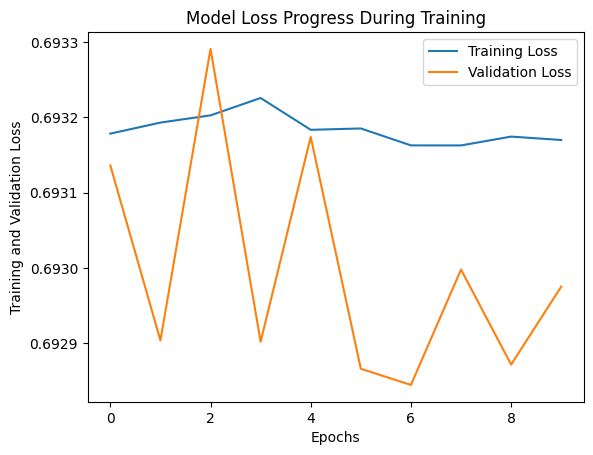

In [197]:
plt.plot(ANN_epochs_hist.history['loss'])
plt.plot(ANN_epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'])

In [198]:
ANN_predict = model.predict(X_test)

11/11 [==============================] - 1s 8ms/step


In [199]:
ANN_predict_Leb = [1 if i >.5 else 0 for i in ANN_predict ]

In [200]:
print('The accuracy of the model : ', round(accuracy_score(y_test, ANN_predict_Leb), 3))
print('The precision of the model : ', round(precision_score(y_test, ANN_predict_Leb), 3))
print('The recall of the model : ', round(recall_score(y_test, ANN_predict_Leb), 3))
print('The f1 score of the model : ', round(f1_score(y_test, ANN_predict_Leb), 3))
print('\nThe classification_report of the model :\n\n', classification_report(y_test, ANN_predict_Leb))

The accuracy of the model :  0.452
The precision of the model :  0.0
The recall of the model :  0.0
The f1 score of the model :  0.0

The classification_report of the model :

               precision    recall  f1-score   support

           0       0.45      1.00      0.62       149
           1       0.00      0.00      0.00       181

    accuracy                           0.45       330
   macro avg       0.23      0.50      0.31       330
weighted avg       0.20      0.45      0.28       330



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde